# **Computational and Numerical Methods Lab-10**

```
Abhimanyu Karia: 202201435
Devarshi Patel : 202201447
```

# Forward Euler Method:

- It is a widely used numerical technique for solving ordinary differential equations (ODEs).
- Useful for initial value problems, where the value of the function is known at an initial point, and we want to estimate its values at subsequent points.
- approximates the value of y at each time step by using the value of y and its derivative $f(t,y)$ at the previous step
- Formula:
    - $y_{n+1} = y_{n} + h.f(t_{n},y_{n})$
    - $t_{n+1} = t_{n} + h$
    - where h is the step size


# Pros of Forward Euler Method:

- Easy to implement
- Useful for understanding basic concepts in numerical methods.

# Cons of Forward Euler Method

- Not very accurate for large step sizes.
- Can become unstable if the step size is too large, especially for stiff ODEs (those with rapidly changing solutions).

# Q - 1

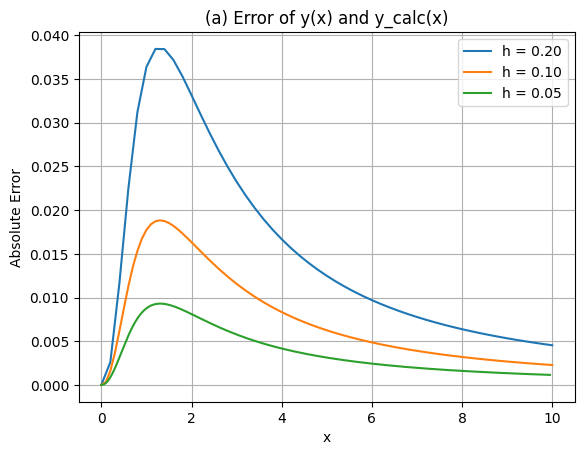


(a) Error of y(x) and y_calc(x) Error Ratios:
For x = 2.00:
 Error Ratio (h=0.2 to h=0.1): 0.49
 Error Ratio (h=0.1 to h=0.05): 0.50
For x = 5.00:
 Error Ratio (h=0.2 to h=0.1): 0.50
 Error Ratio (h=0.1 to h=0.05): 0.50
For x = 8.00:
 Error Ratio (h=0.2 to h=0.1): 0.50
 Error Ratio (h=0.1 to h=0.05): 0.50


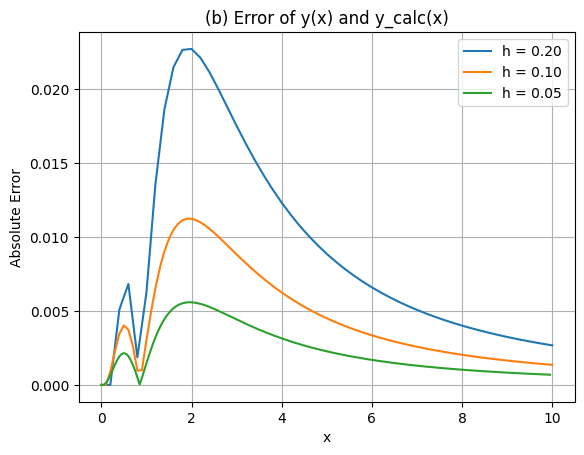


(b) Error of y(x) and y_calc(x) Error Ratios:
For x = 2.00:
 Error Ratio (h=0.2 to h=0.1): 0.49
 Error Ratio (h=0.1 to h=0.05): 0.50
For x = 5.00:
 Error Ratio (h=0.2 to h=0.1): 0.51
 Error Ratio (h=0.1 to h=0.05): 0.50
For x = 8.00:
 Error Ratio (h=0.2 to h=0.1): 0.51
 Error Ratio (h=0.1 to h=0.05): 0.50


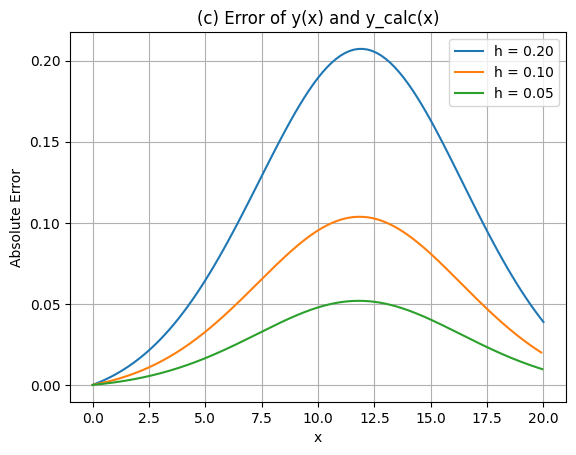


(c) Error of y(x) and y_calc(x) Error Ratios:
For x = 2.00:
 Error Ratio (h=0.2 to h=0.1): 0.51
 Error Ratio (h=0.1 to h=0.05): 0.50
For x = 5.00:
 Error Ratio (h=0.2 to h=0.1): 0.51
 Error Ratio (h=0.1 to h=0.05): 0.50
For x = 8.00:
 Error Ratio (h=0.2 to h=0.1): 0.51
 Error Ratio (h=0.1 to h=0.05): 0.50


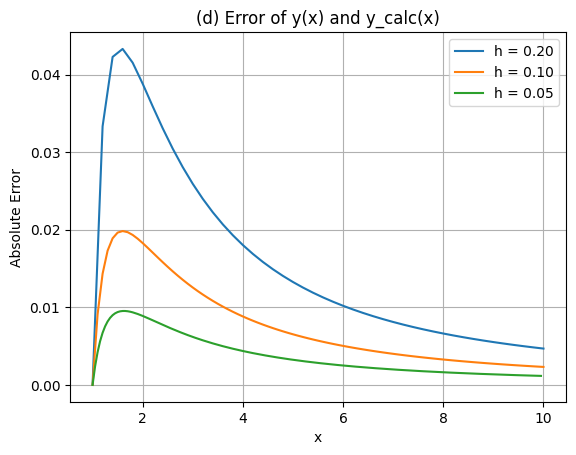


(d) Error of y(x) and y_calc(x) Error Ratios:
For x = 2.00:
 Error Ratio (h=0.2 to h=0.1): 0.47
 Error Ratio (h=0.1 to h=0.05): 0.49
For x = 5.00:
 Error Ratio (h=0.2 to h=0.1): 0.49
 Error Ratio (h=0.1 to h=0.05): 0.50
For x = 8.00:
 Error Ratio (h=0.2 to h=0.1): 0.49
 Error Ratio (h=0.1 to h=0.05): 0.50


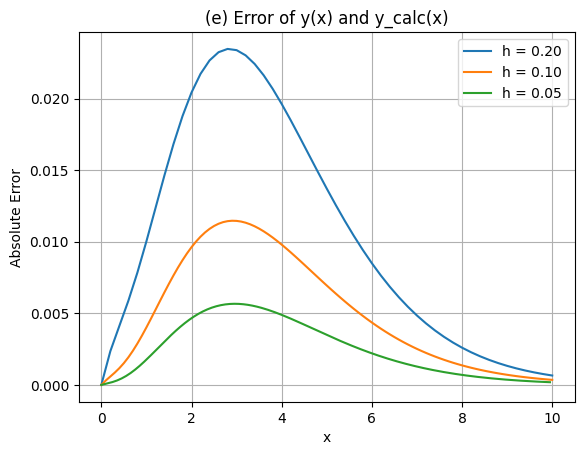


(e) Error of y(x) and y_calc(x) Error Ratios:
For x = 2.00:
 Error Ratio (h=0.2 to h=0.1): 0.47
 Error Ratio (h=0.1 to h=0.05): 0.48
For x = 5.00:
 Error Ratio (h=0.2 to h=0.1): 0.51
 Error Ratio (h=0.1 to h=0.05): 0.50
For x = 8.00:
 Error Ratio (h=0.2 to h=0.1): 0.53
 Error Ratio (h=0.1 to h=0.05): 0.51


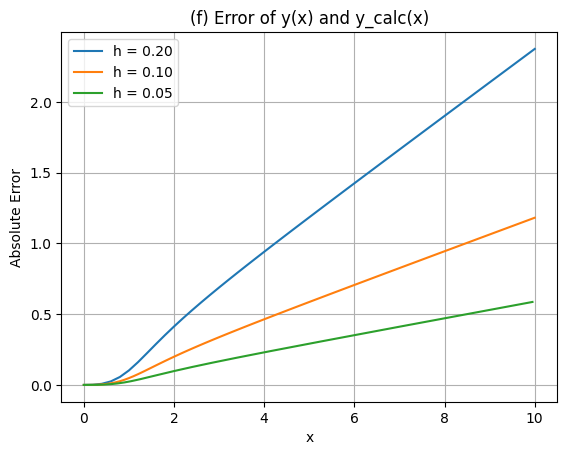


(f) Error of y(x) and y_calc(x) Error Ratios:
For x = 2.00:
 Error Ratio (h=0.2 to h=0.1): 0.48
 Error Ratio (h=0.1 to h=0.05): 0.49
For x = 5.00:
 Error Ratio (h=0.2 to h=0.1): 0.49
 Error Ratio (h=0.1 to h=0.05): 0.50
For x = 8.00:
 Error Ratio (h=0.2 to h=0.1): 0.50
 Error Ratio (h=0.1 to h=0.05): 0.50


C:\Users\abhim\AppData\Local\Temp\ipykernel_66168\2290096093.py:89: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(3 * (x**3 - x) + 1)


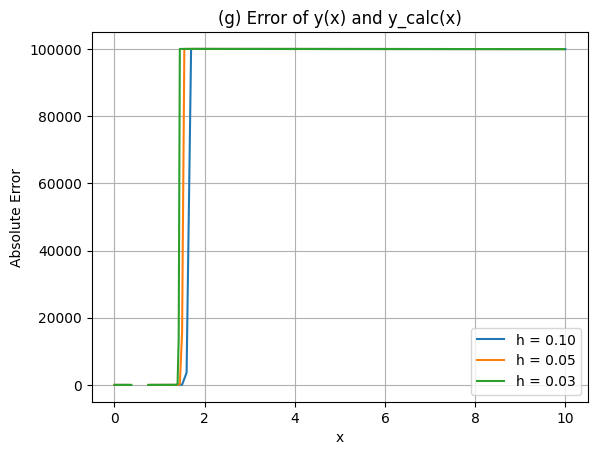


(g) Error of y(x) and y_calc(x) Error Ratios:
For x = 2.00:
 Error Ratio (h=0.1 to h=0.05): 1.00
 Error Ratio (h=0.05 to h=0.025): 1.00
For x = 5.00:
 Error Ratio (h=0.1 to h=0.05): 1.00
 Error Ratio (h=0.05 to h=0.025): 1.00
For x = 8.00:
 Error Ratio (h=0.1 to h=0.05): 1.00
 Error Ratio (h=0.05 to h=0.025): 1.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function for plotting errors and calculating error ratios
def plot_error(x_range, h_values, y_func, ydash_func, y0, title_text, y_limit=1e10):
    step_labels = [f"h = {h:.2f}" for h in h_values]
    selected_x_values = [2, 5, 8]  # Example values within range for error ratio observation
    errors = np.zeros((len(selected_x_values), len(h_values)))  # To store errors for each h

    # Loop over each step size h
    for i, h in enumerate(h_values):
        x_values = [x_range[0]]
        y_obs = [y0]
        y_actual = [y0]
        y_calc = y0

        # Compute y values and absolute errors
        x_val = x_range[0] + h
        while x_val <= x_range[1]:
            # Calculate y, with a limit check to avoid overflow
            y_calc = y_calc + h * ydash_func(x_val, min(y_calc, y_limit))
            if abs(y_calc) > y_limit:
                y_calc = np.sign(y_calc) * y_limit  # Cap y_calc at y_limit
            y_obs.append(y_calc)
            y_actual.append(y_func(x_val))
            x_values.append(x_val)
            x_val += h

        # Calculate absolute error
        abs_error = np.abs(np.array(y_obs) - np.array(y_actual))
        plt.plot(x_values, abs_error, label=step_labels[i])

        # Store error at selected x-values
        for x_idx, sel_x in enumerate(selected_x_values):
            closest_idx = np.argmin(np.abs(np.array(x_values) - sel_x))
            errors[x_idx, i] = abs_error[closest_idx]

    plt.legend(loc='best')
    plt.xlabel('x')
    plt.ylabel('Absolute Error')
    plt.title(title_text)
    plt.grid(True)
    plt.show()

    # Display error ratios for each selected x-value
    print(f"\n{title_text} Error Ratios:")
    for x_idx, sel_x in enumerate(selected_x_values):
        print(f"For x = {sel_x:.2f}:")
        if len(h_values) > 1:
            ratio1 = errors[x_idx, 1] / errors[x_idx, 0]
            print(f" Error Ratio (h={h_values[0]} to h={h_values[1]}): {ratio1:.2f}")
        if len(h_values) > 2:
            ratio2 = errors[x_idx, 2] / errors[x_idx, 1]
            print(f" Error Ratio (h={h_values[1]} to h={h_values[2]}): {ratio2:.2f}")

# part a)
def y_a(x):
    return np.arctan(x)
def ydash_a(x, y):
    return np.cos(y)**2

# part b)
def y_b(x):
    return x / (1 + x**2)
def ydash_b(x, y):
    return 1 / (1 + x**2) - 2 * y**2

# part c)
def y_c(x):
    return 20 / (1 + 19 * np.exp(-x / 4))
def ydash_c(x, y):
    return (1 / 4) * y * (1 - (1 / 20) * y)

# part d)
def y_d(x):
    return 1 / x
def ydash_d(x, y):
    return -y**2

# part e)
def y_e(x):
    return (1 + 0.5 * x**2) * np.exp(-x)
def ydash_e(x, y):
    return x * np.exp(-x) - y

# part f)
def y_f(x):
    return np.sqrt(0.5 * x**4 + 1)
def ydash_f(x, y):
    return x**3 / y

# part g)
def y_g(x):
    return np.sqrt(3 * (x**3 - x) + 1)
def ydash_g(x, y):
    return (3 * x**2 - 1) * y**2

plot_error([0, 10], [0.2, 0.1, 0.05], y_a, ydash_a, 0, '(a) Error of y(x) and y_calc(x)')
plot_error([0, 10], [0.2, 0.1, 0.05], y_b, ydash_b, 0, '(b) Error of y(x) and y_calc(x)')
plot_error([0, 20], [0.2, 0.1, 0.05], y_c, ydash_c, 1, '(c) Error of y(x) and y_calc(x)')
plot_error([1, 10], [0.2, 0.1, 0.05], y_d, ydash_d, 1, '(d) Error of y(x) and y_calc(x)')
plot_error([0, 10], [0.2, 0.1, 0.05], y_e, ydash_e, 1, '(e) Error of y(x) and y_calc(x)')
plot_error([0, 10], [0.2, 0.1, 0.05], y_f, ydash_f, 1, '(f) Error of y(x) and y_calc(x)')

# Reduced step sizes for case (g) to prevent overflow
plot_error([0, 10], [0.1, 0.05, 0.025], y_g, ydash_g, 1, '(g) Error of y(x) and y_calc(x)', y_limit=1e5)


# Q - 2

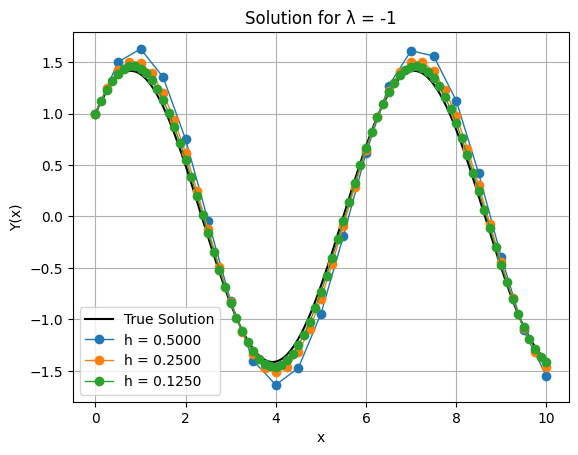

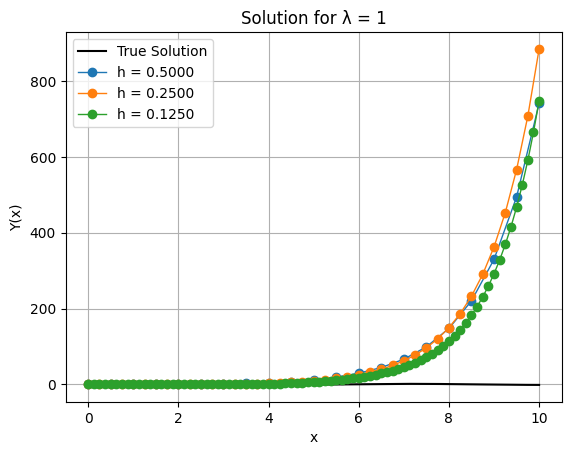

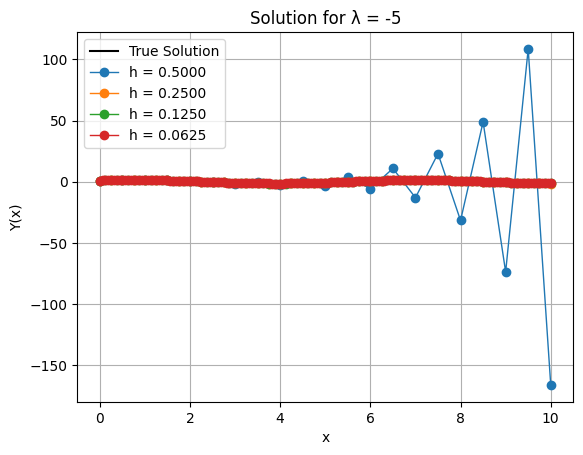

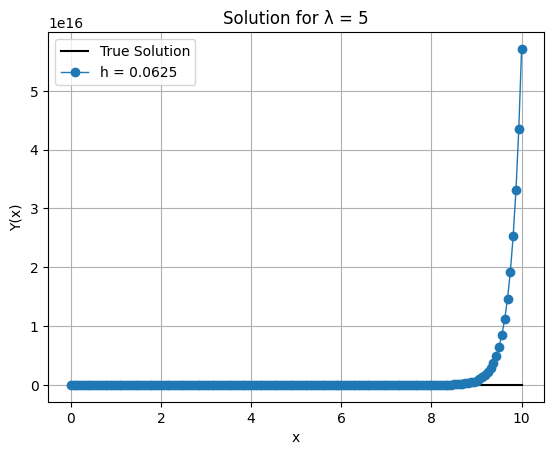

In [3]:
# Define end of x-range and true solution function
x_end = 10
true_solution = lambda x: np.sin(x) + np.cos(x)

# Define the differential equation function
def f(x, Y, lambda_val):
    return lambda_val * Y + (1 - lambda_val) * np.cos(x) - (1 + lambda_val) * np.sin(x)

# Define different lambda and h values
lambda_values = [-1, 1, -5, 5]
h_values = {
    -1: [0.5, 0.25, 0.125],
    1: [0.5, 0.25, 0.125],
    -5: [0.5, 0.25, 0.125, 0.0625],
    5: [0.0625]
}

# Loop over each lambda value
for lambda_val in lambda_values:
    h_list = h_values[lambda_val]
    plt.figure()
    plt.title(f'Solution for λ = {lambda_val}')
    plt.xlabel('x')
    plt.ylabel('Y(x)')
    plt.grid(True)
    
    # Plot the true solution
    x_true = np.linspace(0, x_end, 1000)
    y_true = true_solution(x_true)
    plt.plot(x_true, y_true, 'k-', linewidth=1.5, label='True Solution')
    
    # Loop over each step size h
    for h in h_list:
        # Define the x values and initialize Y with the initial condition
        x = np.arange(0, x_end + h, h)
        Y = np.zeros(len(x))
        Y[0] = 1  # Initial condition Y(0) = 1

        # Perform the numerical integration using Euler's method
        for n in range(len(x) - 1):
            Y[n+1] = Y[n] + h * f(x[n], Y[n], lambda_val)
        
        # Plot the numerical solution
        plt.plot(x, Y, 'o-', linewidth=1, label=f'h = {h:.4f}')
    
    plt.legend()
    plt.show()
